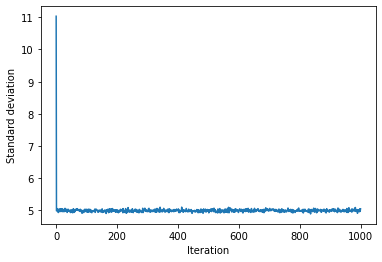

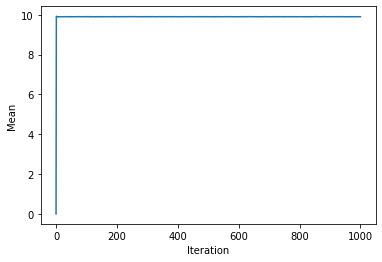

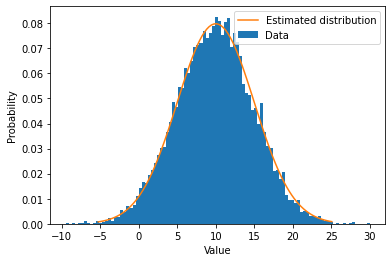

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import invgamma

#Function that generates normally distributed rvs
def normal(data,var):
  return np.random.normal(np.mean(data),var/len(data))

#Function that generates rvs from an inverse gamma distribution
def inverse_gamma(data,mu):
  return invgamma.rvs(a=len(data)/2, scale=sum((data-mu)**2)/2) 

#Given data for a Gaussian with mean=10, sigma=5
data = np.random.normal(10, 5, 10000)

#Setting variables
mu_list = []
std_list = []
mu = 0
mu_list.append(mu)
N = 1000 #Amount of iteration steps

#Iterating
for _ in range(N):
    var = inverse_gamma(data,mu)
    mu = normal(data,var)
    mu_list.append(mu)
    std_list.append(np.sqrt(var))

#Plot variance over time
plt.figure()
plt.plot(std_list)
plt.xlabel('Iteration')
plt.ylabel('Standard deviation')
plt.savefig('var_1d')

#Plot mean over time
plt.figure()
plt.plot(mu_list)
plt.xlabel('Iteration')
plt.ylabel('Mean')
plt.savefig('mean_1d')

#Plot distribution and data
plt.figure()
x = np.linspace(mu_list[-1]-3*std_list[-1],mu_list[-1]+3*std_list[-1],100)
y = 1/(np.sqrt(2*np.pi*25))*np.exp(-(x-10)**2/50)
plt.hist(data, bins=100, density=True, label = 'Data')
plt.plot(x, y, label = 'Estimated distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.savefig('1d_distribution')
plt.show()